# Assignment 2 - Bad vs. Good Connections
## Author - Salinee Kingbaisomboon
### UW NetID: 1950831

## Instructions
1. Read data
2. Build a classifier
3. Determine your model accuracy
4. Modify data by handling class imbalance
5. Use the same model on updated data
6. What is the accuracy?
7. Describe your findings

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE 
from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib import *

import warnings

warnings.filterwarnings("ignore") # To suppress warning

%matplotlib inline

pd.options.display.max_rows = None

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI420/2019/Datasets/Intrusion%20Detection.csv'
df = pd.read_csv(filename)
# Described DataFrame
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
count,97308.000000,9.730800e+04,9.730800e+04,97308.000000,97308.0,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,...,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000
mean,216.618798,1.157123e+03,3.385562e+03,0.000010,0.0,0.000031,0.045135,0.000185,0.719047,0.028990,...,202.006084,0.845039,0.056462,0.134121,0.024139,0.002121,0.001068,0.057706,0.055819,0.000308
std,1359.006741,3.422086e+04,3.757305e+04,0.003206,0.0,0.009617,0.859471,0.020775,0.449467,4.046376,...,86.965239,0.305171,0.180003,0.280997,0.049664,0.029417,0.015721,0.224963,0.218861,0.017556
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.470000e+02,1.360000e+02,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,170.000000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.310000e+02,4.210000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.130000e+02,2.124000e+03,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.010000,0.070000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,2.194619e+06,5.134218e+06,1.000000,0.0,3.000000,30.000000,4.000000,1.000000,884.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
# Print DataFrame's size
print(df.shape)
# Print DataFrame's data types
print(df.dtypes)

(97308, 42)
duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_ra

In [4]:
# Onehot-encoded these three categorical columnh
df = pd.concat([df,pd.get_dummies(df['protocol_type'], prefix='protocol_type')],axis=1)
df = pd.concat([df,pd.get_dummies(df['service'], prefix='service')],axis=1)
df = pd.concat([df,pd.get_dummies(df['flag'], prefix='flag')],axis=1)

# Drop the unused columns
df.drop(['protocol_type'],axis=1, inplace=True)
df.drop(['service'],axis=1, inplace=True)
df.drop(['flag'],axis=1, inplace=True)

In [5]:
# View first five rows of the data frame
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_urp_i,flag_OTH,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
# Declare constants
testFraction = 0.2 # ratio of test data over all data
C_parameter = 50. / len(df) # parameter for regularization of the model
class_parameter = 'ovr' # parameter for dealing with multiple classes
penalty_parameter = 'l1' # parameter for the optimizer (solver) in the function
solver_parameter = 'saga' # optimization system used
tolerance_parameter = 0.1 # termination parameter

In [8]:
# CLASSIFICATION MODELS - use LogisticRegression model
targetOutcome = pd.DataFrame(df,columns=['Class'])
allInputs = pd.DataFrame(df,columns=df.columns.difference(['Class']))
X, XX, Y, YY = train_test_split(allInputs, targetOutcome, test_size = testFraction, random_state = 0)
clf = LogisticRegression(C=C_parameter, multi_class=class_parameter, penalty=penalty_parameter, solver=solver_parameter, tol=tolerance_parameter)
clf.fit(X, Y.values.ravel())
bothProbabilities = clf.predict_proba(XX)
probabilities = bothProbabilities[:,1]

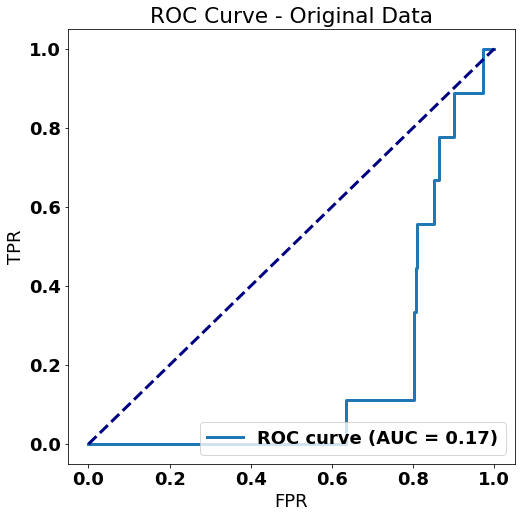

In [9]:
 # False Positive Rate, True Posisive Rate, probability thresholds
fpr, tpr, th = metrics.roc_curve(YY, probabilities)
AUC = metrics.auc(fpr, tpr)

# Plot ROC Curve
plt.rcParams["figure.figsize"] = [8, 8] # Square
font = {'family' : 'Sans', 'weight' : 'bold', 'size' : 18}
matplotlib.rc('font', **font)
plt.figure()
plt.title('ROC Curve - Original Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--') # reference line for random classifier
plt.legend(loc="lower right")
plt.show()

In [10]:
# Modify data by handling class imbalance using SMOTE method
print('Original training targets shape {}'.format(Counter(targetOutcome.values.ravel())))
sm = SMOTE(random_state=0)
allInputs_resample, targetOutcome_resample = sm.fit_sample(allInputs, targetOutcome.values.ravel())
print('Resampled dataset shape {}'.format(Counter(targetOutcome_resample)))

Original training targets shape Counter({0: 97278, 1: 30})
Resampled dataset shape Counter({0: 97278, 1: 97278})


In [11]:
# CLASSIFICATION MODELS - use LogisticRegression model with resampling data
X_resample, XX_resample, Y_resample, YY_resample = train_test_split(allInputs_resample, targetOutcome_resample, test_size = testFraction, random_state = 0)
clf = LogisticRegression(C=C_parameter, multi_class=class_parameter, penalty=penalty_parameter, solver=solver_parameter, tol=tolerance_parameter)
clf.fit(X_resample, Y_resample)
bothProbabilities = clf.predict_proba(XX_resample)
probabilities = bothProbabilities[:,1]

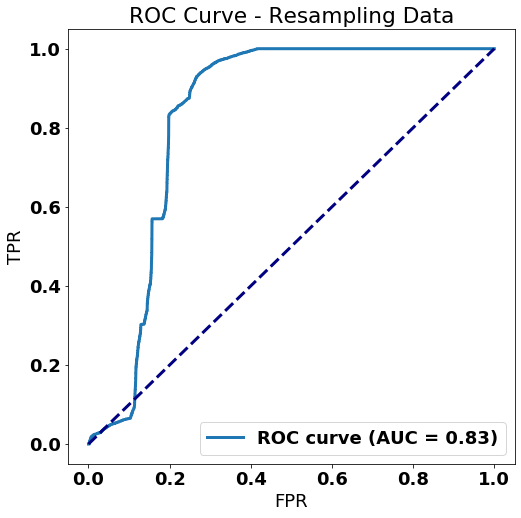

In [12]:
 # False Positive Rate, True Posisive Rate, probability thresholds
fpr, tpr, th = metrics.roc_curve(YY_resample, probabilities)
AUC = metrics.auc(fpr, tpr)

plt.rcParams["figure.figsize"] = [8, 8] # Square
font = {'family' : 'Sans', 'weight' : 'bold', 'size' : 18}
matplotlib.rc('font', **font)
plt.figure()
plt.title('ROC Curve - Resampling Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--') # reference line for random classifier
plt.legend(loc="lower right")
plt.show()

***
**Summary:**
1. I used **LogisticRegression** for Classifier model.
2. There are three categorical columns (**protocol_type**, **service** and **flag**) which I need to do one-hot encoded.
3. From the **original data set**, the model yeild **AUC = 0.17**.
4. From the **resampling data using SMOTE**, the model yeild **AUC = 0.83**.
5. We clearly see that **Modify data by handling class imbalance** does improve model's accuracy.

**Note:** I didn't perform the <font color=red>**feature selection**</font>, so this model used all features available. The current model can be improved by using <font color=green>**feature selection's technique**</font> which I will implement on the milestone project.
***